In [1]:
import numpy as np 
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [3]:
warnings.filterwarnings("ignore", category=FutureWarning)

#### Importing the Dataset

In [4]:
Email_classifier_df = pd.read_csv(
    r"C:\DataFiles\Masters2023\Data Science\Email Spam Classifier\spam.csv",
    encoding="latin1"
)

In [5]:
Email_classifier_df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
Email_classifier_df.shape

(5572, 5)

### 1. Data Cleaning

In [7]:
Email_classifier_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
Email_classifier_df.drop(columns=["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], inplace=True)

In [9]:
Email_classifier_df.sample(5)

,v1,v2
1258,ham,Honey boo I'm missing u.
3049,ham,Ok
2275,ham,Is that on the telly? No its Brdget Jones!
4820,ham,Im good! I have been thinking about you...
490,ham,"Sorry man my account's dry or I would, if you ..."


In [10]:
# Renaming the Columns
Email_classifier_df.rename(columns={'v1': 'target', 'v2': 'text'}, inplace=True)
Email_classifier_df.sample(5)

,target,text
484,ham,You should change your fb to jaykwon thuglyfe ...
2104,ham,Anyway seriously hit me up when you're back be...
4829,ham,"The word \Checkmate\"" in chess comes from the ..."
1274,ham,Let me know how to contact you. I've you settl...
4826,ham,Yup but it's not giving me problems now so may...


In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [12]:
Email_classifier_df['target'] = encoder.fit_transform(Email_classifier_df['target'])
Email_classifier_df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
Email_classifier_df.isnull().sum()

target    0
text      0
dtype: int64

In [14]:
# Check for Duplicate Values
Email_classifier_df = Email_classifier_df.drop_duplicates(keep='first')

In [15]:
Email_classifier_df.shape

(5169, 2)

### 2. EDA

In [16]:
Email_classifier_df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
Email_classifier_df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

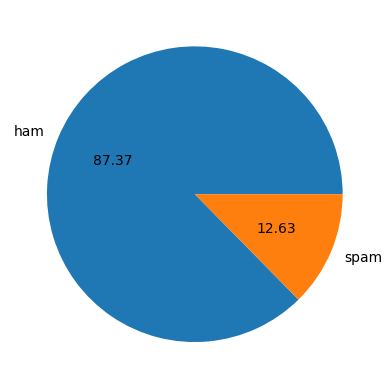

In [18]:
# Dataset is highly imbalanced
plt.pie(Email_classifier_df['target'].value_counts(), labels=['ham','spam'], autopct="%0.2f")
plt.show()

In [19]:
import nltk

In [20]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sunde\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [24]:
Email_classifier_df['num_of_characters'] = Email_classifier_df['text'].apply(len)

In [25]:
Email_classifier_df.head()

,target,text,num_of_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [28]:
# Number of Words
Email_classifier_df['num_of_words'] = Email_classifier_df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [29]:
Email_classifier_df.head()

,target,text,num_of_characters,num_of_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [38]:
Email_classifier_df['num_of_sentences'] = Email_classifier_df['text'].apply(lambda x:nltk.sent_tokenize(x))

In [39]:
Email_classifier_df[['num_of_characters','num_of_words','num_of_sentences']].describe()

,num_of_characters,num_of_words
count,5169.000000,5169.000000
mean,78.977945,18.455794
std,58.236293,13.324758
min,2.000000,1.000000
25%,36.000000,9.000000
50%,60.000000,15.000000
75%,117.000000,26.000000
max,910.000000,220.000000


In [ ]:
# ham
Email_classifier_df[Email_classifier_df['target'] == 0][['num_of_characters','num_of_words','num_of_sentences']].describe()

,num_of_characters,num_of_words
count,4516.000000,4516.000000
mean,70.459256,17.123782
std,56.358207,13.493970
min,2.000000,1.000000
25%,34.000000,8.000000
50%,52.000000,13.000000
75%,90.000000,22.000000
max,910.000000,220.000000


In [41]:
# spam
Email_classifier_df[Email_classifier_df['target'] == 1][['num_of_characters','num_of_words','num_of_sentences']].describe()

,num_of_characters,num_of_words
count,653.000000,653.000000
mean,137.891271,27.667688
std,30.137753,7.008418
min,13.000000,2.000000
25%,132.000000,25.000000
50%,149.000000,29.000000
75%,157.000000,32.000000
max,224.000000,46.000000


<Axes: xlabel='num_of_characters', ylabel='Count'>

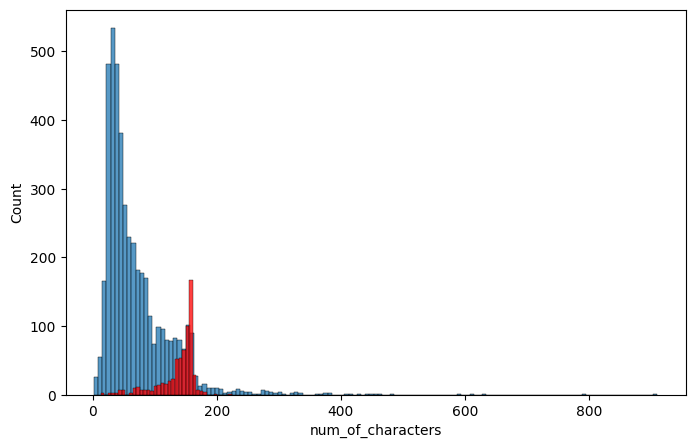

In [46]:
plt.figure(figsize=(8,5))
sns.histplot(Email_classifier_df[Email_classifier_df['target'] == 0]['num_of_characters'])
sns.histplot(Email_classifier_df[Email_classifier_df['target'] == 1]['num_of_characters'], color='red')

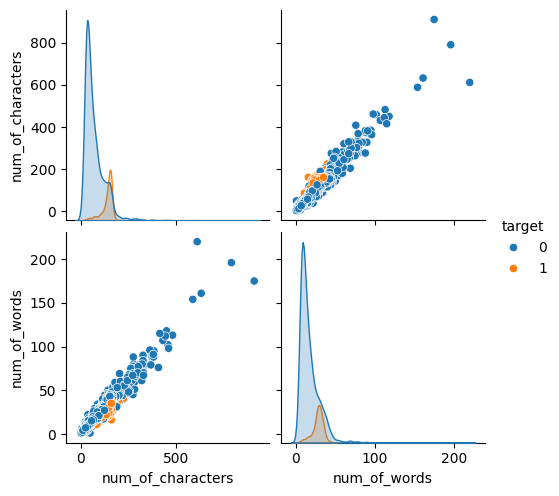

In [47]:
sns.pairplot(Email_classifier_df,hue='target')

<Axes: >

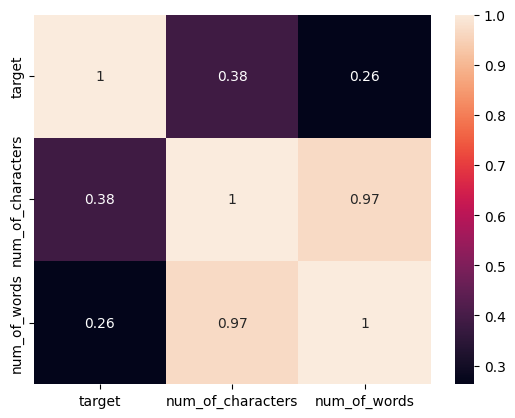

In [50]:
sns.heatmap(Email_classifier_df.select_dtypes(include='number').corr(), annot=True)

### 3. Text Preprocessing
- Lower case  
- Tokenization  
- Removing special characters  
- Removing stopwords and punctuation  
- Stemming

In [ ]:
from nltk.corpus import stopwords
import string

def transform_text(text):

    # Lower Case
    text = text.lower()

    # Tokenization
    text = nltk.word_tokenize(text)

    # Removing special characters
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    # Removing stopwords and punctuation 
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    # Stemming
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

In [ ]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('dancing')

### 4. Evaluation

### 5. Improvement